#### Fardin Rastakhiz @2023

In [1]:
from Scripts.Configs.ConfigClass import Config
from Scripts.DataManager.GraphConstructor.GraphConstructor import TextGraphType
import os
from Scripts.DataManager.GraphLoader.DigiKalaGraphDataModule import DigiKalaGraphDataModule
import torch
from torch.utils.flop_counter import FlopCounterMode
root_path = %pwd
config = Config(root_path)
# config = Config(r'E:\Darsi\Payan Name Arshad\Second Work\ColorIntelligence2\ColorIntelligence')
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 2

c:\Users\razieh\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\razieh\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
2024-06-17 12:22:00 WARNING: Language fa package default expects mwt, which has been added
2024-06-17 12:22:00 INFO: Loading these models for language: fa (Persian):
| Processor | Package        |
------------------------------
| tokenize  | perdt          |
| mwt       | perdt          |
| lemma     | perdt_nocharlm |

2024-06-17 12:22:00 INFO: Using device: cpu
2024-06-17 12:22:00 INFO: Loading: tokenize
2024-06-17 12:22:00 INFO: Loadin

In [2]:
from Scripts.Models.GraphEmbedding.HeteroDeepGraphEmbedding4 import HeteroDeepGraphEmbedding4
from Scripts.Models.GraphEmbedding.HeteroDeepGraphEmbedding5 import HeteroDeepGraphEmbedding5
from Scripts.Models.GraphEmbedding.HeteroDeepGraphEmbedding6 import HeteroDeepGraphEmbedding6
from Scripts.Models.GraphEmbedding.HeteroDeepGraphEmbedding8 import HeteroDeepGraphEmbedding8

In [3]:
from Scripts.Models.LightningModels.LightningModels import HeteroMultiClassLightningModel
from Scripts.Models.LossFunctions.HeteroLossFunctions import MulticlassHeteroLoss1, MulticlassHeteroLoss2, MulticlassHeteroLoss3
from lightning.pytorch.callbacks import EarlyStopping, ModelCheckpoint
import lightning as L
from lightning.pytorch.tuner import Tuner
from Scripts.Models.ModelsManager.ClassifierModelManager import ClassifierModelManager

In [4]:
import stanza

In [5]:
print(stanza.__version__)

1.8.2


In [6]:

graph_type = TextGraphType.CO_OCCURRENCE |  TextGraphType.DEPENDENCY | TextGraphType.SEQUENTIAL | TextGraphType.SENTIMENT | TextGraphType.FULL | TextGraphType.SENTENCE | TextGraphType.TAGS
data_manager = DigiKalaGraphDataModule(config, test_size=0.2, val_size=0.2, shuffle=False, start_data_load=0 , end_data_load = 100 , device='cpu', batch_size=batch_size, graph_type=graph_type, load_preprocessed_data = False)
data_manager.load_labels()
data_manager.load_graphs()

2024-06-17 12:22:01 WARNING: Language fa package default expects mwt, which has been added
2024-06-17 12:22:01 INFO: Loading these models for language: fa (Persian):
| Processor | Package |
-----------------------
| tokenize  | perdt   |
| mwt       | perdt   |

2024-06-17 12:22:01 INFO: Using device: cpu
2024-06-17 12:22:01 INFO: Loading: tokenize
2024-06-17 12:22:01 INFO: Loading: mwt
2024-06-17 12:22:01 INFO: Done loading processors!
 Creating Graphs : 100%|██████████| 100/100 [00:00<00:00, 99983.41it/s]


filename: c:\Users\razieh\Downloads\Beyond-Words\data/GraphData/DigiKala\co_occ\graph_var.txt
self.start_data_load: 0
self.end_data_load: 100
self.saving_batch_size: 1000


 Loding Graphs From File :   0%|          | 0/1 [00:00<?, ?it/s]

i: 0, min_j: 100
data path: c:\Users\razieh\Downloads\Beyond-Words\data/GraphData/DigiKala\co_occ\0_100_compressed.pt
first step after loading data


 Loding Graphs From File :   0%|          | 0/1 [00:20<?, ?it/s]


ValueError: only one element tensors can be converted to Python scalars

In [ ]:
X, y = next(iter(data_manager.test_dataloader()))

In [ ]:
X

HeteroDataBatch(
  general={
    x=[2, 300],
    batch=[2],
    ptr=[3],
  },
  word={
    x=[119, 300],
    batch=[119],
    ptr=[3],
  },
  (general, general_word, word)={
    edge_index=[2, 119],
    edge_attr=[119],
  },
  (word, word_general, general)={
    edge_index=[2, 119],
    edge_attr=[119],
  },
  (word, seq, word)={
    edge_index=[2, 234],
    edge_attr=[234],
  }
)

In [ ]:
from Scripts.DataManager.GraphConstructor.SequentialGraphConstructor import SequentialGraphConstructor

texts = ['متن فارسی آزمایشی شماره یک' , 'متن فارسی آزمایشی شماره دو' , 'متن فارسی آزمایشی شماره سه']
graph_const = SequentialGraphConstructor(texts, r'graphs/sequence',config=config, naming_prepend='graph', start_data_load=0, end_data_load=2, load_preprocessed_data=False , use_compression=True , use_general_node=True)
# graph_const.setup(load_preprocessed_data=True)

AAAA
BBBB


2024-06-17 12:00:49 WARNING: Language fa package default expects mwt, which has been added
2024-06-17 12:00:49 INFO: Loading these models for language: fa (Persian):
| Processor | Package        |
------------------------------
| tokenize  | perdt          |
| mwt       | perdt          |
| lemma     | perdt_nocharlm |

2024-06-17 12:00:49 INFO: Using device: cpu
2024-06-17 12:00:49 INFO: Loading: tokenize
2024-06-17 12:00:49 INFO: Loading: mwt
2024-06-17 12:00:49 INFO: Loading: lemma
2024-06-17 12:00:49 INFO: Done loading processors!


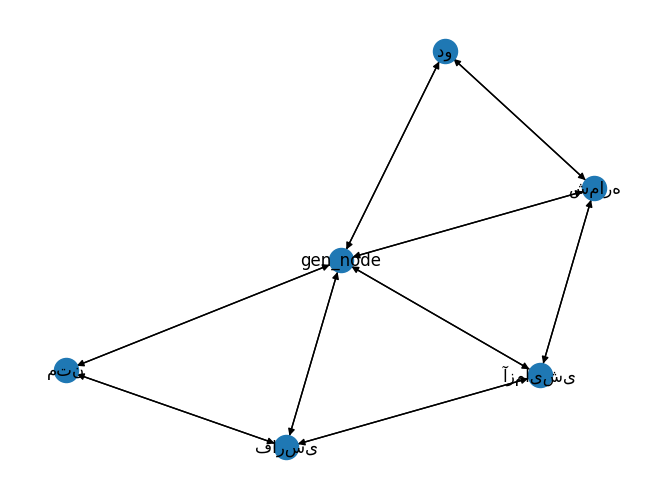

In [ ]:
graph_const.draw_graph(1)

In [ ]:
# data_manager.update_batch_size(256)

In [ ]:
val_dataloader = data_manager.val_dataloader()
X3, Y3 = next(iter(val_dataloader))

In [ ]:
len(val_dataloader)

10

In [ ]:
from copy import copy
metadata = copy(X3.metadata())

In [ ]:

edge_type_weights = {
    # 'full': [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
    # 'full-non-sentiment': [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
    'seq': [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
    # 'dep': [1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
    # 'tag': [0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
    # 'general_sentence': [0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.],
    # 'sentence': [0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.],
    # 'sentiment': [0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.],
}
# type_checkpoint = {
#     #  'dep': r'logs\hetero_model_14_AG\version_0\checkpoints\epoch=38-step=17199.ckpt',
#      'tag': r'logs\hetero_model_15_AG_tag\version_0\checkpoints\epoch=9-step=4410.ckpt',
#      'general_sentence': '',
#      'sentence': '',
# }

In [ ]:
# edge_type_weights = {
#     'seq_gen': [1, 1, 1],
#     'seq': [0, 0, 1]
# }
# type_checkpoint = {
#     'seq_gen': r'logs\hetero_model_12_AG\version_1\checkpoints\epoch=24-step=11025.ckpt',
#     'seq': r'logs\hetero_model_12_AG\version_2\checkpoints\epoch=22-step=10143.ckpt'
# }

In [ ]:
from os import path
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, hinge_loss
import torchmetrics

def save_evaluation(model_mgr, eval_dataloader, name_prepend: str='',
                 give_confusion_matrix: bool=True,
                 give_report: bool=True,
                 give_f1_score: bool=False,
                 give_accuracy_score: bool=False,
                 give_precision_score: bool=False,
                 give_recall_score: bool=False,
                 give_hinge_loss: bool=False,
                 multi_class: bool=False
                 ):

        test_metrics_path = path.join(model_mgr.log_dir, model_mgr.log_name, f'version_{model_mgr.logger.version}', f'{name_prepend}_test_metrics.txt')

        y_true = []
        y_pred = []
        model_mgr.lightning_model.eval()
        model_mgr.lightning_model.model.eval()
        model_mgr.torch_model.eval()
        for X, y in eval_dataloader:
            model_mgr.trainer.model.eval()
            with torch.no_grad():
                y_p = model_mgr.trainer.model(X.to(model_mgr.device))
            if type(y_p) is tuple:
                y_p = y_p[0]

            if multi_class:
                y_pred.append(y_p.detach().to(y.device))
                y_true.append(y)
            else:
                y_pred.append((y_p>0).to(torch.int32).detach().to(y.device))
                y_true.append(y.to(torch.int32))
        y_true = torch.concat(y_true)
        y_pred = torch.concat(y_pred)
        print(y_true.shape)
        print(y_pred.shape)
        if multi_class:
            y_true_num = torch.argmax(y_true, dim=1)
            y_pred_num = torch.argmax(y_pred, dim=1)
        else:
            y_true_num = y_true
            y_pred_num = y_pred

        print(y_true_num.shape)
        print(y_pred_num.shape)
        with open(test_metrics_path, 'at+') as f:
            if(give_confusion_matrix):
                print(f'confusion_matrix: \n{confusion_matrix(y_true_num, y_pred_num)}', file=f)
            if(give_report):
                print(classification_report(y_true_num, y_pred_num), file=f)
            if(give_f1_score):
                if multi_class:
                    print(f'f1_score: {f1_score(y_true_num, y_pred_num, average=None)}', file=f)
                else:
                    print(f'f1_score: {f1_score(y_true_num, y_pred_num)}', file=f)
            if(give_accuracy_score):
                print(f'accuracy_score: {accuracy_score(y_true_num, y_pred_num)}', file=f)
            if(give_precision_score):
                if multi_class:
                    print(f'f1_score: {precision_score(y_true_num, y_pred_num, average=None)}', file=f)
                else:
                    print(f'f1_score: {precision_score(y_true_num, y_pred_num)}', file=f)
            if(give_recall_score):
                if multi_class:
                    print(f'f1_score: {recall_score(y_true_num, y_pred_num, average=None)}', file=f)
                else:
                    print(f'f1_score: {recall_score(y_true_num, y_pred_num)}', file=f)
            # if(give_hinge_loss):
            #     print(f'hinge_loss: {hinge_loss(y_true_num, y_pred)}', file=f)


In [ ]:
(metadata[0].remove(x, inplace=True) for x in ['dep', 'tag', 'sentence', 'sentiment'])

<generator object <genexpr> at 0x0000021EE91250E0>

In [ ]:
metadata

(['general', 'word'],
 [('general', 'general_word', 'word'),
  ('word', 'word_general', 'general'),
  ('word', 'seq', 'word')])

In [ ]:
# metadata = (['word'], [('word', 'seq', 'word')])

In [ ]:
[x for x in metadata[0] if x not in ['dep', 'tag', 'sentence', 'sentiment']]

['general', 'word']

In [ ]:
[x for x in metadata[1] if x not in ['dep', 'tag', 'sentence', 'sentiment']]

[('general', 'general_word', 'word'),
 ('word', 'word_general', 'general'),
 ('word', 'seq', 'word')]

In [ ]:
for k in edge_type_weights:
    graph_embedding = HeteroDeepGraphEmbedding8(300, 2, metadata, 32, dropout=0.2, edge_type_count=2, edge_type_weights=edge_type_weights[k], active_keys = ['word','general'])
    graph_embedding = graph_embedding.to(device)
    # callbacks = [
    # ModelCheckpoint(save_top_k=5, mode='max', monitor='val_acc', save_last=True)
    # ]


    # loss_func = MulticlassHeteroLoss2(exception_keys=['word'], enc_factor=0.0002)
    # optimizer = torch.optim.Adam(graph_embedding.parameters(), lr=0.0045, weight_decay=0.0012)
    # lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[5, 10, 20, 35], gamma=0.6, verbose=True)
    # lightning_model = HeteroMultiClassLightningModel(graph_embedding, 4,
    #                                     optimizer=optimizer,
    #                                     loss_func=loss_func,
    #                                     learning_rate=0.0045,
    #                                     batch_size=batch_size,
    #                                     user_lr_scheduler=True,
    #                                     lr_scheduler=lr_scheduler,
    #                                     min_lr=0.0005
    #                                     ).to(device)
    # lightning_model.model.to(device)

    # model_manager = ClassifierModelManager(graph_embedding, lightning_model, log_name='hetero_model_18_AG',device=device, num_train_epoch=70)
    flopt_counter = FlopCounterMode(graph_embedding)
    with flopt_counter:
        graph_embedding(X3.to(device))
    # model_manager.draw_summary(data_manager.val_dataloader())
    # model_manager.fit(datamodule=data_manager, ckpt_path=r'logs\hetero_model_18_AG\version_8\checkpoints\epoch=38-step=18252.ckpt')

    # model_manager.save_plot_csv_logger(loss_names=['train_loss_epoch', 'val_loss'], eval_names=['train_acc_epoch', 'val_acc'], name_prepend=f'tests_{k}')
    # model_manager.torch_model = model_manager.torch_model.to(device)
    # save_evaluation(model_manager, data_manager.val_dataloader(), f'{k}',True, True, True, True, True, True, True, multi_class=True)

Module                                           FLOP    % Total
------------------------------------------  ---------  ---------
HeteroDeepGraphEmbedding8                   6221.360K    100.00%
 - aten.addmm                               5979.136K     96.11%
 - aten.mm                                   181.824K      2.92%
 - aten.convolution                            0.400K      0.01%
 - aten.bmm                                   60.000K      0.96%
 HeteroDeepGraphEmbedding8.hetero_linear1   1094.400K     17.59%
  - aten.addmm                              1094.400K     17.59%
 HeteroDeepGraphEmbedding8.hetero_gat_1      472.576K      7.60%
  - aten.addmm                               458.752K      7.37%
  - aten.mm                                   13.824K      0.22%
 HeteroDeepGraphEmbedding8.hetero_linear_2   116.736K      1.88%
  - aten.addmm                               116.736K      1.88%
 HeteroDeepGraphEmbedding8.hetero_gat_2     4430.400K     71.21%
  - aten.addmm           

c:\Users\razieh\Downloads\Beyond-Words\Scripts\Models\GraphEmbedding\HeteroDeepGraphEmbedding8.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pw1 = torch.nn.Parameter(torch.tensor(self.edge_type_weights, dtype=torch.float32), requires_grad=False)


In [ ]:
import torch.nn.functional as F
from torch import Tensor
import torch
from torch.nn import Linear
from torch_geometric.nn import BatchNorm, MemPooling, to_hetero, PairNorm
from torch_geometric.data import HeteroData
from Scripts.Models.BaseModels.HeteroGat import HeteroGat
from Scripts.Models.BaseModels.HeteroLinear import HeteroLinear

class HeteroDeepGraphEmbedding6(torch.nn.Module):

    def __init__(self,
                 input_feature: int, out_features: int,
                 metadata,
                 hidden_feature: int=256,
                 device = 'cpu',
                 dropout=0.1,
                 edge_type_count=9,
                 edge_type_weights=-1,
                 active_keys = ['dep', 'tag', 'word', 'sentence', 'general'],
                 num_pooling_classes=1
                 ):

        super(HeteroDeepGraphEmbedding6, self).__init__()
        self.input_features = input_feature
        self.num_out_features = out_features
        self.hidden_feature: int = hidden_feature
        self.edge_type_count = edge_type_count
        self.edge_type_weights = torch.nn.Parameter(torch.tensor([1]* self.edge_type_count if edge_type_weights==-1 else  edge_type_weights).to(torch.float32), requires_grad=False)

        self.part_weight_norm = torch.nn.LayerNorm((self.edge_type_count,))
        self.norm = PairNorm()
        self.drop = torch.nn.Dropout(0.2)
        self.active_keys = active_keys

        self.hetero_linear1 = to_hetero(HeteroLinear(self.input_features,self.hidden_feature, use_dropout=False, use_batch_norm=True), metadata)

        self.hetero_gat_1 = to_hetero(HeteroGat(self.hidden_feature, self.hidden_feature, dropout, num_heads=2), metadata)
        self.hetero_gat_2 = to_hetero(HeteroGat(self.hidden_feature, self.hidden_feature, dropout, num_heads=2), metadata)

        self.hetero_linear_2 = to_hetero(HeteroLinear(self.hidden_feature, self.input_features, dropout, use_batch_norm=True), metadata)

        self.num_pooling_classes = torch.nn.Parameter(torch.tensor(num_pooling_classes).to(torch.int32), requires_grad=False)
        self.mem_pool = MemPooling(self.hidden_feature, self.hidden_feature, 2, self.num_pooling_classes)

        self.linear_1 = Linear(self.hidden_feature* self.num_pooling_classes, self.hidden_feature)
        self.linear_2 = Linear(self.hidden_feature, self.hidden_feature)
        self.batch_norm_1 = BatchNorm(self.hidden_feature)

        self.output_layer = Linear(self.hidden_feature, self.num_out_features)

        self.dep_embedding = torch.nn.Embedding(45, self.input_features)
        self.tag_embedding = torch.nn.Embedding(50, self.input_features)
        self.dep_unembedding = torch.nn.Linear(self.hidden_feature, 45)
        self.tag_unembedding = torch.nn.Linear(self.hidden_feature, 50)

        self.pw1 = torch.nn.Parameter(torch.tensor(self.edge_type_weights, dtype=torch.float32), requires_grad=False)

        self.x_batches = None
        self.x_batches_cpu = None
        self.x_dict_cpu_1 = None
        self.x_dict_cpu_2 = None


    def forward(self, x: HeteroData) -> Tensor:
        self.x_batches = {k:x[k].batch for k in self.active_keys}
        # self.x_batches_cpu = {k:self.x_batches[k].to('cpu') for k in self.active_keys}
        x_dict, edge_attr_dict, edge_index_dict = self.preprocess_data(x)
        edge_attr_dict = self.update_weights(edge_attr_dict, self.pw1)
        x_dict = self.hetero_linear1(x_dict)
        x_dict = self.hetero_gat_1(x_dict, edge_index_dict, edge_attr_dict)
        # self.x_dict_cpu_1 = {k: x_dict[k].to('cpu') for k in x_dict}
        self.normalize(x_dict, self.x_batches)
        x_dict = self.hetero_gat_2(x_dict, edge_index_dict, edge_attr_dict)
        # self.x_dict_cpu_2 = {k: x_dict[k].to('cpu') for k in x_dict}
        x_pooled, S = self.mem_pool(x_dict['word'], self.x_batches['word'])

        x_pooled = x_pooled.view(x_pooled.shape[0], -1)
        x_pooled = F.relu(self.linear_1(x_pooled))
        x_pooled = F.relu(self.batch_norm_1(self.linear_2(x_pooled)))
        out = self.output_layer(x_pooled)

        x_dict_out = self.hetero_linear_2(x_dict)
        if 'dep' in x_dict_out:
            x_dict_out['dep'] = self.dep_unembedding(x_dict['dep'])
        if 'tag' in x_dict_out:
            x_dict_out['tag'] = self.tag_unembedding(x_dict['tag'])

        return out, x_dict_out

    def preprocess_data(self, x):
        x_dict = {key: x.x_dict[key] for key in x.x_dict}
        if 'dep' in x_dict:
            x_dict['dep'] = self.dep_embedding(x_dict['dep'])
        if 'tag' in x_dict:
            x_dict['tag'] = self.tag_embedding(x_dict['tag'])

        edge_attr_dict = x.edge_attr_dict
        edge_index_dict = x.edge_index_dict

        return x_dict, edge_attr_dict, edge_index_dict

    def normalize(self, x_dict, x_batches):
        for k in self.active_keys:
            vecs = x_dict[k]
            if k not in x_batches:
                print('k is not in x_batches')
                continue
            batches = x_batches[k]
            if batches is None:
                print('batches is none')
                continue
            if len(batches) == 0:
                print('batches is empty')
                continue

            x_dict[k] = self.norm(vecs, batches)
        return x_dict

    def update_weights(self, edge_attr_dict, part_weights):
        for i, key in enumerate(edge_attr_dict):
            edge_attr = edge_attr_dict[key]
            if edge_attr is None or edge_attr == ('word', 'seq', 'word'):
                continue
            edge_attr_dict[key]= edge_attr * part_weights[i]
        return edge_attr_dict

    def get_scale_same(self, scale:float, attributes: Tensor):
        if attributes is None or len(attributes) == 0:
            return
        attributes = scale * torch.ones_like(attributes)
        return attributes

In [ ]:
from typing import List
import torch
from torch import nn

from Scripts.Models.LossFunctions.HeteroLossArgs import HeteroLossArgs


class MulticlassHeteroLoss2(torch.nn.Module):
    def __init__(self, exception_keys: List[str], enc_factor=0.0, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.cel_loss=  torch.nn.CrossEntropyLoss()
        self.mse_loss = torch.nn.MSELoss()
        self.exception_keys = exception_keys
        self.enc_factor = enc_factor

    def forward(self, out_pred: HeteroLossArgs, out_main: HeteroLossArgs):
        loss = self.cel_loss(out_pred.y, out_main.y)
        x_dict_keys = [k for k in out_pred.x_dict.keys() if k not in self.exception_keys]

        for key in x_dict_keys:
            tensor1 = out_pred.x_dict[key]
            tensor2 = out_main.x_dict[key]
            if tensor2.ndim == 1 and tensor2.dtype is torch.long:
                tensor2 = torch.nn.functional.one_hot(input=tensor2.to(torch.long), num_classes=tensor1.shape[1]).to(torch.float32)
            loss += self.enc_factor * (self.mse_loss(tensor1, tensor2))
        return loss

In [ ]:
metadata

(['general', 'word'],
 [('general', 'general_word', 'word'),
  ('word', 'word_general', 'general'),
  ('word', 'seq', 'word')])

In [ ]:
# Fardin Rastakhiz @ 2023


from torch import nn, Tensor
import torch.nn.functional as F
from torch_geometric.nn import BatchNorm


class HeteroLinear(nn.Module):

    def __init__(self, in_feature, out_feature, dropout = 0.2, use_dropout=True, use_batch_norm=False, use_activation=True) -> None:
        super().__init__()
        self.linear = nn.Linear(in_feature, out_feature)
        self.batch_norm = BatchNorm(out_feature)
        self.dropout= nn.Dropout(dropout)
        self.use_batch_norm = use_batch_norm
        self.use_dropout = use_dropout
        self.use_activation=use_activation

    def forward(self, x: Tensor) -> Tensor:

        x = self.linear(x)
        if self.use_batch_norm:
            x = self.batch_norm(x)
        if self.use_activation:
            x = F.leaky_relu(x)
        if self.use_dropout:
            x = self.dropout(x)
        return x

In [ ]:
import torch
print(torch.cuda.device_count())

0


In [ ]:
device

device(type='cpu')

In [ ]:
X.metadata

<bound method HeteroData.metadata of HeteroDataBatch(
  general={
    x=[2, 300],
    batch=[2],
    ptr=[3],
  },
  word={
    x=[119, 300],
    batch=[119],
    ptr=[3],
  },
  (general, general_word, word)={
    edge_index=[2, 119],
    edge_attr=[119],
  },
  (word, word_general, general)={
    edge_index=[2, 119],
    edge_attr=[119],
  },
  (word, seq, word)={
    edge_index=[2, 234],
    edge_attr=[234],
  }
)>

In [ ]:
# torch.concat([t1,t2,], dim=0)

In [ ]:
X, y = next(iter(data_manager.train_dataloader()))

In [ ]:
y

tensor([[1., 0., 0.],
        [1., 0., 0.]])

In [ ]:
for i in range(1):
    for k in edge_type_weights:
        graph_embedding = HeteroDeepGraphEmbedding6(300, 3, metadata, 32, dropout=0.1, edge_type_count=2, edge_type_weights=edge_type_weights[k], active_keys=['word', 'general'])
        graph_embedding = graph_embedding.to(device)
        callbacks = [
        ModelCheckpoint(save_top_k=5, mode='max', monitor='val_acc', save_last=True)
        ]
        loss_func = MulticlassHeteroLoss2(exception_keys=['word'], enc_factor=0.0003)
        optimizer = torch.optim.Adam(graph_embedding.parameters(), lr=0.0045, weight_decay=0.00125)
        lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[6, 13, 28, 45, 60], gamma=0.5, verbose=True)
        lightning_model = HeteroMultiClassLightningModel(graph_embedding, 4,
                                            optimizer=optimizer,
                                            loss_func=loss_func,
                                            learning_rate=0.045,
                                            batch_size=batch_size,
                                            user_lr_scheduler=True,
                                            lr_scheduler=lr_scheduler,
                                            min_lr=0.0005
                                            ).to(device)
        lightning_model.model.to(device)

        model_manager = ClassifierModelManager(graph_embedding, lightning_model, log_name='hetero_model_20_AG',device=device, num_train_epoch=70)
        model_manager.fit(datamodule=data_manager)
        # model_manager.save_plot_csv_logger(loss_names=['train_loss_epoch', 'val_loss'], eval_names=['train_acc_epoch', 'val_acc'], name_prepend=f'tests_{i}_{k}')
        model_manager.torch_model = model_manager.torch_model.to(device)
        save_evaluation(model_manager, data_manager.val_dataloader(), f'{i}_{k}',True, True, True, True, True, True, True, multi_class=True)

C:\Users\razieh\AppData\Local\Temp\ipykernel_18488\2718485509.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pw1 = torch.nn.Parameter(torch.tensor(self.edge_type_weights, dtype=torch.float32), requires_grad=False)
c:\Users\razieh\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
c:\Users\razieh\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightning\pytorch\utilities\parsing.py:198: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
GPU available: False, used: False
TPU

Epoch 0:   0%|          | 0/30 [00:00<?, ?it/s] Epoch 69: 100%|██████████| 30/30 [00:01<00:00, 26.86it/s, v_num=28, train_loss_step=0.797, train_acc_step=0.500, val_acc=0.800, train_loss_epoch=0.574, train_acc_epoch=0.800]

`Trainer.fit` stopped: `max_epochs=70` reached.


Epoch 69: 100%|██████████| 30/30 [00:01<00:00, 26.60it/s, v_num=28, train_loss_step=0.797, train_acc_step=0.500, val_acc=0.800, train_loss_epoch=0.574, train_acc_epoch=0.800]
torch.Size([20, 3])
torch.Size([20, 3])
torch.Size([20])
torch.Size([20])


c:\Users\razieh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\razieh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\razieh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [ ]:
# for i in range(1):
#     for k in edge_type_weights:
#         graph_embedding = HeteroDeepGraphEmbedding6(300, 3, metadata, 32, dropout=0.1, edge_type_count=2, edge_type_weights=edge_type_weights[k], active_keys=['word', 'general'])
#         graph_embedding = graph_embedding.to(device)
#         callbacks = [
#         ModelCheckpoint(save_top_k=5, mode='max', monitor='val_acc', save_last=True)
#         ]
#         loss_func = MulticlassHeteroLoss2(exception_keys=['word'], enc_factor=0.0003)
#         optimizer = torch.optim.Adam(graph_embedding.parameters(), lr=0.0045, weight_decay=0.00125)
#         lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[6, 13, 28, 45, 60], gamma=0.5, verbose=True)
#         lightning_model = HeteroMultiClassLightningModel(graph_embedding, 4,
#                                             optimizer=optimizer,
#                                             loss_func=loss_func,
#                                             learning_rate=0.045,
#                                             batch_size=batch_size,
#                                             user_lr_scheduler=True,
#                                             lr_scheduler=lr_scheduler,
#                                             min_lr=0.0005
#                                             ).to(device)
#         lightning_model.model.to(device)

#         model_manager = ClassifierModelManager(graph_embedding, lightning_model, log_name='hetero_model_20_AG',device=device, num_train_epoch=70)
#         model_manager.fit(datamodule=data_manager)
#         # model_manager.save_plot_csv_logger(loss_names=['train_loss_epoch', 'val_loss'], eval_names=['train_acc_epoch', 'val_acc'], name_prepend=f'tests_{i}_{k}')
#         model_manager.torch_model = model_manager.torch_model.to(device)
#         save_evaluation(model_manager, data_manager.val_dataloader(), f'{i}_{k}',True, True, True, True, True, True, True, multi_class=True)

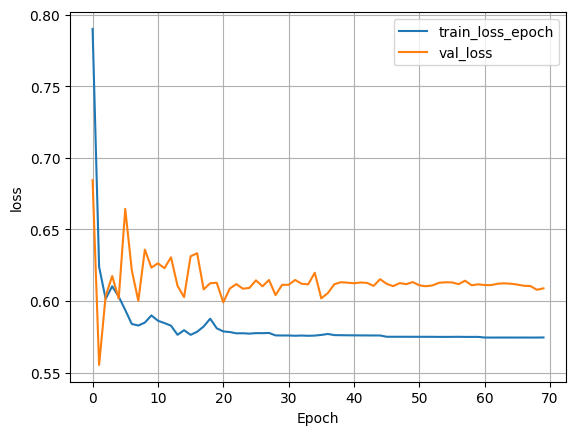

In [ ]:
model_manager.save_plot_csv_logger(loss_names=['train_loss_epoch', 'val_loss'], eval_names=['train_acc_epoch', 'val_acc'], name_prepend=f'tests_{i}_{k}')


In [ ]:
# for i in range(1):
#     for k in edge_type_weights:
#         graph_embedding = HeteroDeepGraphEmbedding6(300, 4, metadata, 16, dropout=0.1, edge_type_count=2, edge_type_weights=edge_type_weights[k])
#         graph_embedding = graph_embedding.to(device)
#         callbacks = [
#         ModelCheckpoint(save_top_k=5, mode='max', monitor='val_acc', save_last=True)
#         ]
#         loss_func = MulticlassHeteroLoss2(exception_keys=['word'], enc_factor=0.0003)
#         optimizer = torch.optim.Adam(graph_embedding.parameters(), lr=0.0045, weight_decay=0.00125)
#         lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[6, 13, 28, 45, 60], gamma=0.5, verbose=True)
#         lightning_model = HeteroMultiClassLightningModel(graph_embedding, 4,
#                                             optimizer=optimizer,
#                                             loss_func=loss_func,
#                                             learning_rate=0.045,
#                                             batch_size=batch_size,
#                                             user_lr_scheduler=True,
#                                             lr_scheduler=lr_scheduler,
#                                             min_lr=0.0005
#                                             ).to(device)
#         lightning_model.model.to(device)

#         model_manager = ClassifierModelManager(graph_embedding, lightning_model, log_name='hetero_model_20_AG',device=device, num_train_epoch=70)
#         model_manager.fit(datamodule=data_manager)
#         model_manager.save_plot_csv_logger(loss_names=['train_loss_epoch', 'val_loss'], eval_names=['train_acc_epoch', 'val_acc'], name_prepend=f'tests_{i}_{k}')
#         model_manager.torch_model = model_manager.torch_model.to(device)
#         save_evaluation(model_manager, data_manager.val_dataloader(), f'{i}_{k}',True, True, True, True, True, True, True, multi_class=True)

In [ ]:
# for i in range(1):
#     for k in edge_type_weights:
#         graph_embedding = HeteroDeepGraphEmbedding6(300, 3, metadata, 32, dropout=0.1, edge_type_count=9, edge_type_weights=edge_type_weights[k])
#         graph_embedding = graph_embedding.to(device)
#         callbacks = [
#         ModelCheckpoint(save_top_k=5, mode='max', monitor='val_acc', save_last=True)
#         ]
#         loss_func = MulticlassHeteroLoss2(exception_keys=['word'], enc_factor=0.0003)
#         optimizer = torch.optim.Adam(graph_embedding.parameters(), lr=0.0045, weight_decay=0.00125)
#         lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[6, 13, 28, 45, 60], gamma=0.5, verbose=True)
#         lightning_model = HeteroMultiClassLightningModel(graph_embedding, 4,
#                                             optimizer=optimizer,
#                                             loss_func=loss_func,
#                                             learning_rate=0.045,
#                                             batch_size=batch_size,
#                                             user_lr_scheduler=True,
#                                             lr_scheduler=lr_scheduler,
#                                             min_lr=0.0005
#                                             ).to(device)
#         lightning_model.model.to(device)

#         model_manager = ClassifierModelManager(graph_embedding, lightning_model, log_name='hetero_model_20_AG',device=device, num_train_epoch=70)
#         model_manager.fit(datamodule=data_manager)
        # model_manager.save_plot_csv_logger(loss_names=['train_loss_epoch', 'val_loss'], eval_names=['train_acc_epoch', 'val_acc'], name_prepend=f'tests_{i}_{k}')
        # model_manager.torch_model = model_manager.torch_model.to(device)
        # save_evaluation(model_manager, data_manager.val_dataloader(), f'{i}_{k}',True, True, True, True, True, True, True, multi_class=True)

In [ ]:
# model_manager.trainer.fit_loop.max_epochs=100
# # model_manager.trainer.fit_loop.max_steps=-1

# model_manager.fit(datamodule=data_manager)
# model_manager.save_plot_csv_logger(loss_names=['train_loss_epoch', 'val_loss'], eval_names=['train_acc_epoch', 'val_acc'], name_prepend=f'tests2_{k}')
# model_manager.torch_model = model_manager.torch_model.to(device)
# save_evaluation(model_manager, data_manager.val_dataloader(), f'tests2_{k}',True, True, True, True, True, True, True, multi_class=True)

In [ ]:
torch.cuda.is_available()

False

In [ ]:
# graph_embedding = HeteroDeepGraphEmbedding6(300, 4, X3.metadata(), 32, dropout=0.2, edge_type_count=11, edge_type_weights=edge_type_weights[k])
# graph_embedding = graph_embedding.to(device)
# lightning_model = HeteroMultiClassLightningModel.load_from_checkpoint(r'logs\hetero_model_18_AG\version_26\checkpoints\epoch=74-step=35100.ckpt', model=graph_embedding, num_classes=4)
# lightning_model.eval()
# # lightning_model.model.to(device)
# model_manager.torch_model = model_manager.torch_model.to(device)
# save_evaluation(model_manager, data_manager.val_dataloader(), 'test11_t',True, True, True, True, True, True, True, multi_class=True)

In [ ]:
# mega_graphs = {}
# for k in [1, 2]:
#     mega_graphs[k] = sgc.to_graph(mega_texts[k])

In [ ]:
import torch_geometric

In [ ]:
# mega_X = torch_geometric.data.Batch.from_data_list([mega_graphs[i].to(device) for i in [1, 2, 3, 4]])

In [ ]:
# lightning_model.eval()

# with torch.no_grad():
#     y_pred = lightning_model(mega_X.to(device))

In [ ]:
# if type(y_pred) is tuple:
#     y_pred = y_pred[0]
# y_pred2 = []
# y_pred2 = y_pred.detach().to('cpu')
# y_true_num = torch.argmax(y_pred2, dim=1)

In [ ]:
# y_true_num

In [ ]:
# y_pred[0]

In [ ]:
# mega_graphs[1]

In [ ]:
# len(mega_texts[1])

In [ ]:

model_manager.lightning_model.loss_func.enc_factor=0.0001
# model_manager.update_learning_rate(0.0003)

optimizer = torch.optim.Adam(graph_embedding.parameters(), lr=0.0003, weight_decay=0.0012)
model_manager.lightning_model.configure_optimizers()['lr_scheduler']['scheduler'].optimizer = optimizer
# model_manager.lightning_model.configure_optimizers()['lr_scheduler']['scheduler'].milestones = Counter(milestones)
model_manager.lightning_model.optimizer =optimizer

In [ ]:
# model_manager.fit(datamodule=data_manager)

# model_manager.save_plot_csv_logger(loss_names=['train_loss_epoch', 'val_loss'], eval_names=['train_acc_epoch', 'val_acc'], name_prepend=f'tests2_{k}')
# model_manager.torch_model = model_manager.torch_model.to(device)
# save_evaluation(model_manager, data_manager.val_dataloader(), f'{k}2',True, True, True, True, True, True, True, multi_class=True)

In [ ]:
# model_manager.torch_model = model_manager.torch_model.to(device)
# save_evaluation(model_manager, data_manager.test_dataloader(), 'test1_t',True, True, True, True, True, True, True, multi_class=True)

In [ ]:
model_manager.trainer.save_checkpoint(r'logs\hetero_model_17_AG\version_12\checkpoints\last_checkpoint_140.ckpt')

In [ ]:
model_manager.update_learning_rate(0.0005625)

In [ ]:
# model_manager.fit(datamodule=data_manager, ckpt_path=r'logs\hetero_model_17_AG\version_12\checkpoints\epoch=51-step=24076.ckpt')

In [ ]:
# optimizer = torch.optim.Adam(graph_embedding.parameters(), lr=0.001, weight_decay=0.0005)
# lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[5, 15, 35], gamma=0.5, verbose=True)
# graph_embedding = HeteroDeepGraphEmbedding4(300, 4, X3.metadata(), 256, device, 0.2, 11)
# lightning_model = HeteroMultiClassLightningModel.load_from_checkpoint(r'logs\hetero_model_11_AG\version_5\checkpoints\epoch=1-step=882.ckpt',
#                                     model=graph_embedding,
#                                     num_classes=4)
                                    # ,
                                    # optimizer=optimizer,
                                    # loss_func=loss_func,
                                    # learning_rate=0.001,
                                    # batch_size=batch_size,
                                    # lr_scheduler=lr_scheduler,
                                    # user_lr_scheduler=True,
                                    # min_lr=0.00003)

In [ ]:
from os import path
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, hinge_loss
import torchmetrics

def save_evaluation(model_mgr, l_model, eval_dataloader, name_prepend: str='',
                 give_confusion_matrix: bool=True,
                 give_report: bool=True,
                 give_f1_score: bool=False,
                 give_accuracy_score: bool=False,
                 give_precision_score: bool=False,
                 give_recall_score: bool=False,
                 give_hinge_loss: bool=False,
                 multi_class: bool=False
                 ):

        test_metrics_path = path.join(model_mgr.log_dir, model_mgr.log_name, f'version_{model_mgr.logger.version}', f'{name_prepend}_test_metrics.txt')

        y_true = []
        y_pred = []
        for X, y in eval_dataloader:
            l_model.eval()
            with torch.no_grad():
                y_p = l_model(X.to(model_mgr.device))
            if type(y_p) is tuple:
                y_p = y_p[0]

            if multi_class:
                y_pred.append(y_p.detach().to(y.device))
                y_true.append(y)
            else:
                y_pred.append((y_p>0).to(torch.int32).detach().to(y.device))
                y_true.append(y.to(torch.int32))
        y_true = torch.concat(y_true)
        y_pred = torch.concat(y_pred)
        print(y_true.shape)
        print(y_pred.shape)
        if multi_class:
            y_true_num = torch.argmax(y_true, dim=1)
            y_pred_num = torch.argmax(y_pred, dim=1)
        else:
            y_true_num = y_true
            y_pred_num = y_pred

        print(y_true_num.shape)
        print(y_pred_num.shape)
        with open(test_metrics_path, 'at+') as f:
            if(give_confusion_matrix):
                print(f'confusion_matrix: \n{confusion_matrix(y_true_num, y_pred_num)}', file=f)
            if(give_report):
                print(classification_report(y_true_num, y_pred_num), file=f)
            if(give_f1_score):
                if multi_class:
                    print(f'f1_score: {f1_score(y_true_num, y_pred_num, average=None)}', file=f)
                else:
                    print(f'f1_score: {f1_score(y_true_num, y_pred_num)}', file=f)
            if(give_accuracy_score):
                print(f'accuracy_score: {accuracy_score(y_true_num, y_pred_num)}', file=f)
            if(give_precision_score):
                if multi_class:
                    print(f'f1_score: {precision_score(y_true_num, y_pred_num, average=None)}', file=f)
                else:
                    print(f'f1_score: {precision_score(y_true_num, y_pred_num)}', file=f)
            if(give_recall_score):
                if multi_class:
                    print(f'f1_score: {recall_score(y_true_num, y_pred_num, average=None)}', file=f)
                else:
                    print(f'f1_score: {recall_score(y_true_num, y_pred_num)}', file=f)
            if(give_hinge_loss):
                print(f'hinge_loss: {hinge_loss(y_true_num, y_pred)}', file=f)

        # test_acc = torchmetrics.Accuracy(task="multiclass", num_classes=4)
        # test_f1 = torchmetrics.F1Score(task="multiclass", num_classes=4)
        # test_precision = torchmetrics.Precision(task="multiclass", num_classes=4)
        # test_recall = torchmetrics.Recall(task="multiclass", num_classes=4)
        # test_confusion_m = torchmetrics.ConfusionMatrix(task="multiclass", num_classes=4)

        # print(f'test_acc: {test_acc(y_true_num, y_pred_num)}')
        # print(f'test_f1: {test_f1(y_true_num, y_pred_num)}')
        # print(f'test_precision: {test_precision(y_true_num, y_pred_num)}')
        # print(f'test_recall: {test_recall(y_true_num, y_pred_num)}')
        # print(f'test_confusion_m: \n{test_confusion_m(y_true_num, y_pred_num)}')

In [ ]:
lightning_model.optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0005625
    maximize: False
    weight_decay: 0.0012
)

In [ ]:
# save_evaluation(model_manager, lightning_model, data_manager.test_dataloader(), 'chpt_n',True, True, True, True, True, True, True, multi_class=True)

In [ ]:
# optimizer = torch.optim.Adam(graph_embedding.parameters(), lr=0.001, weight_decay=0.0005)
# lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[5, 15, 35], gamma=0.5, verbose=True)
# lightning_model = HeteroMultiClassLightningModel.load_from_checkpoint(r'logs\hetero_model_16_AG\version_12\checkpoints\epoch=137-step=60858.ckpt',
#                                     model=graph_embedding,
#                                     num_classes=4)

# save_evaluation(model_manager, lightning_model, data_manager.test_dataloader(), 'chpt_1',True, True, True, True, True, True, True, multi_class=True)

In [ ]:
model_manager.trainer.fit_loop.max_epochs=100
model_manager.trainer.fit_loop.max_steps=-1

model_manager.fit(datamodule=data_manager)

AttributeError: property 'max_steps' of '_FitLoop' object has no setter

In [ ]:

# model_manager.trainer.model.eval()
# model_manager.trainer.model(X3)

In [ ]:
# t_dataloader = data_manager.train_dataloader()

for X1, y1 in val_dataloader:
    model_manager.trainer.model.eval()
    with torch.no_grad():
        y1_pred = model_manager.trainer.model(X1.to(device))
    acc = model_manager.lightning_model.train_acc(torch.argmax(y1_pred[0], dim=1), torch.argmax(y1.to(device), dim=1))
    print(acc)

In [ ]:
# X1, y1 = next(iter(t_dataloader))
model_manager.lightning_model.train_acc

MulticlassAccuracy()

In [ ]:
# model_manager.save_plot_csv_logger(loss_names=['train_loss_epoch', 'val_loss'], eval_names=['train_acc_epoch', 'val_acc'], name_prepend=f'tests_{k}')
# model_manager.torch_model = model_manager.torch_model.to(device)
# save_evaluation(model_manager, data_manager.test_dataloader(), f'{k}',True, True, True, True, True, True, True, multi_class=True)

In [ ]:
# model_manager.save_plot_csv_logger(loss_names=['train_loss_epoch', 'val_loss'], eval_names=['train_acc_epoch', 'val_acc'], name_prepend=f'tests_{k}')
# model_manager.torch_model = model_manager.torch_model.to(device)
# save_evaluation(model_manager, data_manager.val_dataloader(), f'{k}',True, True, True, True, True, True, True, multi_class=True)

In [ ]:
# model_manager.save_plot_csv_logger(loss_names=['train_loss_epoch', 'val_loss'], eval_names=['train_acc_epoch', 'val_acc'], name_prepend=f'tests_{k}')
# model_manager.torch_model = model_manager.torch_model.to(device)
# save_evaluation(model_manager, data_manager.train_dataloader(), f'{k}',True, True, True, True, True, True, True, multi_class=True)

# Text to Graph Tasks

# Test \Practices\Tasks\TextToGraph\TextToTagsGraph.ipynb

In [ ]:
import pandas as pd
train_df = pd.read_csv(r'/content/Beyond-Words/data/DigiKala/train_sm.csv')
test_df = pd.read_csv(r'/content/Beyond-Words/data/DigiKala/test_sm.csv')

In [ ]:
train_df.columns = ['comment', 'label', 'label_id']
test_df.columns = ['comment', 'label', 'label_id']

In [ ]:
train_df = train_df[['label', 'comment']]
test_df = test_df[['label', 'comment']]

In [ ]:
from Scripts.DataManager.GraphConstructor.TagsGraphConstructor import TagsGraphConstructor

In [ ]:
graph_const = TagsGraphConstructor(train_df['comment'][:10], r'data\GraphData\Tag', config, naming_prepend='graph', load_preprocessed_data=False, use_compression=True)
graph_const.setup(load_preprocessed_data=False)


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: fa (Persian):
| Processor | Package        |
------------------------------
| tokenize  | perdt          |
| mwt       | perdt          |
| pos       | perdt_charlm   |
| lemma     | perdt_nocharlm |
| depparse  | perdt_charlm   |
| ner       | arman          |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
 Creating Graphs : 100%|██████████| 10/10 [00:00<00:00, 80815.11it/s]


غذا
خیلی
سرد
بود
در
صورتیکه
فاصله
ما
خیلی
کم
است
بهتره
تونید
ران
یا
سینه
رو
خود
مون
انتخاب
کرد
غذا
بد
بود
حالم
خیییییلی
داد
.
دل
دردو
دل
پیچید
.
معلوم
هست
چه
توش
ریختن
.
افتضاااااااااح
بود
.
دوساعته
ک
حالم
داد
.
با
سلام
سابق
بر
این
بسته
بند
از
کیفیت
به
برخوردار
بود
.
ولی
در
حال
حاضر
ایراد
وجود
داشت
.
به
طور
نمونه
نوشابه
قوطی
فاقد
نی
هست
،
چنگال
برای
سرو
سیب
زمینی
داشت
،
دستمال
کاغذی
هم
در
بسته
بند
هست
.
سلام
،
خیلی
ممنون
و
متشکرم
خیلی
زود
رسید
و
ممنون
من
ازشون
ماده
پیتزا
بسیااار
کم
بود
با
اینکه
قیمت
اصلا
پایین
هست
.
ولی
کلا
طعم
پیتزا
خوب
و
تازه
بود
کیفیت
زیاد
خوب
بود
،
مرغ
که
واسه
ما
آوردن
بو
داد
انگار
که
موند
بود
!
همه
چه
خوب
بود
.
ولی
اگه
تخفیف
داشت
اصلا
خرید
کرد
چون
گرونه
رفت
:
)
filename: /content/Beyond-Words/data\GraphData\Tag/graph_var.txt
self.start_data_load: 0
self.end_data_load: 10
self.saving_batch_size: 1000



 Loding Graphs From File :   0%|          | 0/1 [00:00<?, ?it/s]

data path: /content/Beyond-Words/data\GraphData\Tag/0_10_compressed.pt
first step after loading data



Prepare loaded data: 100%|██████████| 10/10 [00:42<00:00,  4.22s/it]


before pass


 Loding Graphs From File : 100%|██████████| 1/1 [01:12<00:00, 72.27s/it]

after loading data and pass


In [ ]:
graph_const.save_all_data_compressed()

غذا
خیلی
سرد
بود
در
صورتیکه
فاصله
ما
خیلی
کم
است
بهتره
تونید
ران
یا
سینه
رو
خود
مون
انتخاب
کرد
غذا
بد
بود
حالم
خیییییلی
داد
.
دل
دردو
دل
پیچید
.
معلوم
هست
چه
توش
ریختن
.
افتضاااااااااح
بود
.
دوساعته
ک
حالم
داد
.
با
سلام
سابق
بر
این
بسته
بند
از
کیفیت
به
برخوردار
بود
.
ولی
در
حال
حاضر
ایراد
وجود
داشت
.
به
طور
نمونه
نوشابه
قوطی
فاقد
نی
هست
،
چنگال
برای
سرو
سیب
زمینی
داشت
،
دستمال
کاغذی
هم
در
بسته
بند
هست
.
سلام
،
خیلی
ممنون
و
متشکرم
خیلی
زود
رسید
و
ممنون
من
ازشون
ماده
پیتزا
بسیااار
کم
بود
با
اینکه
قیمت
اصلا
پایین
هست
.
ولی
کلا
طعم
پیتزا
خوب
و
تازه
بود
کیفیت
زیاد
خوب
بود
،
مرغ
که
واسه
ما
آوردن
بو
داد
انگار
که
موند
بود
!
همه
چه
خوب
بود
.
ولی
اگه
تخفیف
داشت
اصلا
خرید
کرد
چون
گرونه
رفت
:
)


In [ ]:
graph_const.load_all_data_comppressed()

filename: /content/Beyond-Words/data\GraphData\Tag/graph_var.txt
data loading 0


In [ ]:
graph_const = TagsGraphConstructor(train_df['comment'][:10], r'data\GraphData\Tag', config, naming_prepend='graph', load_preprocessed_data=False, use_compression=True)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: fa (Persian):
| Processor | Package        |
------------------------------
| tokenize  | perdt          |
| mwt       | perdt          |
| pos       | perdt_charlm   |
| lemma     | perdt_nocharlm |
| depparse  | perdt_charlm   |
| ner       | arman          |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [ ]:
print(graph_const.get_first())
print(graph_const.get_first()["word"].x)
print(graph_const.get_first()["tag"].x)

IndexError: list index out of range

# Test \Practices\Tasks\TextToGraph\TextToSequentialGraph.ipynb

In [ ]:
from Scripts.DataManager.GraphConstructor.SequentialGraphConstructor import SequentialGraphConstructor

In [ ]:
graph_const = SequentialGraphConstructor(train_df['comment'][:10], r'data\GraphData\Sequential', config, naming_prepend='graph', load_preprocessed_data=False , use_general_node=True,use_compression=True , num_general_nodes=8)
# graph = graph_const.to_graph(train_df['Review'][0])
graph_const.setup(load_preprocessed_data=False)

AAAA
BBBB


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json


INFO:stanza:Loading these models for language: fa (Persian):
| Processor | Package        |
------------------------------
| tokenize  | perdt          |
| mwt       | perdt          |
| pos       | perdt_charlm   |
| lemma     | perdt_nocharlm |
| depparse  | perdt_charlm   |
| ner       | arman          |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
 Creating Graphs : 100%|██████████| 10/10 [00:00<00:00, 13702.40it/s]


filename: /content/Beyond-Words/data\GraphData\Sequential/graph_var.txt
self.start_data_load: 0
self.end_data_load: 10
self.saving_batch_size: 1000



 Loding Graphs From File :   0%|          | 0/1 [00:00<?, ?it/s]

data path: /content/Beyond-Words/data\GraphData\Sequential/0_10_compressed.pt
first step after loading data



Prepare loaded data:   0%|          | 0/10 [00:00<?, ?it/s]/content/Beyond-Words/Scripts/DataManager/GraphConstructor/SequentialGraphConstructor.py:210: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  general_word_edge_index = torch.transpose(torch.tensor(
/content/Beyond-Words/Scripts/DataManager/GraphConstructor/SequentialGraphConstructor.py:212: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  word_general_edge_index = torch.transpose(torch.tensor(

Prepare loaded data: 100%|██████████| 10/10 [00:34<00:00,  3.47s/it]


before pass


 Loding Graphs From File : 100%|██████████| 1/1 [01:04<00:00, 64.77s/it]

after loading data and pass


In [ ]:
graph_const.save_all_data_compressed()
graph_const.load_all_data_comppressed()

filename: /content/Beyond-Words/data\GraphData\Sequential/graph_var.txt
data loading 0


In [ ]:
print(graph_const.get_first()["word", "word_general", "general"].edge_attr)

tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])


In [ ]:
print(graph_const.get_first()["word", "word_general", "generasl"])

{}


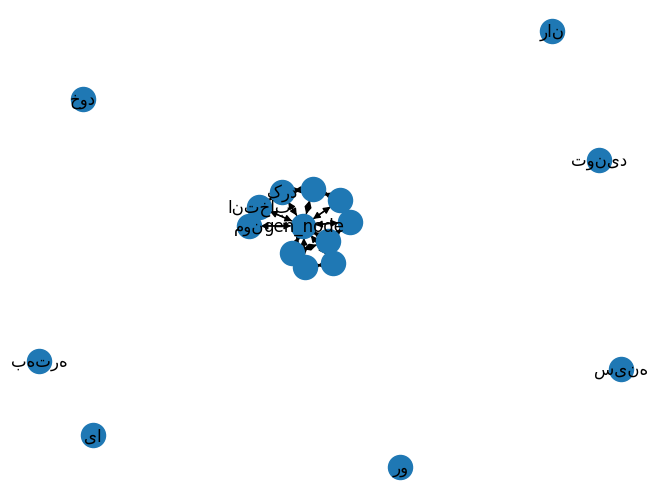

In [ ]:
graph_const.draw_graph(1)

# Test \Practices\Tasks\TextToGraph\TagDepTokenGraphConstructionTest.ipynb

In [ ]:
from Scripts.DataManager.GraphConstructor.TagDepTokenGraphConstructor import TagDepTokenGraphConstructor

In [ ]:
graph_const = TagDepTokenGraphConstructor(train_df['comment'][:10], r'data\GraphData\Full-WSentence-WGeneral', config, naming_prepend='graph', load_preprocessed_data=True, use_sentence_nodes=True, use_general_node=True , use_compression=True)
graph_const.setup(load_preprocessed_data=False)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: fa (Persian):
| Processor | Package        |
------------------------------
| tokenize  | perdt          |
| mwt       | perdt          |
| pos       | perdt_charlm   |
| lemma     | perdt_nocharlm |
| depparse  | perdt_charlm   |
| ner       | arman          |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
 Creating Graphs : 100%|██████████| 10/10 [00:00<00:00, 15586.41it/s]


filename: /content/Beyond-Words/data\GraphData\Full-WSentence-WGeneral/graph_var.txt
self.start_data_load: 0
self.end_data_load: 10
self.saving_batch_size: 1000



 Loding Graphs From File :   0%|          | 0/1 [00:00<?, ?it/s]

data path: /content/Beyond-Words/data\GraphData\Full-WSentence-WGeneral/0_10_compressed.pt
first step after loading data



Prepare loaded data: 100%|██████████| 10/10 [00:37<00:00,  3.75s/it]


before pass


 Loding Graphs From File : 100%|██████████| 1/1 [01:07<00:00, 67.60s/it]

after loading data and pass


In [ ]:
print(graph_const.get_graph(0).edge_attr_dict[('sentence' , 'sentence_word' , 'word')])

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])


In [ ]:
graph_const.draw_graph(0)

# Test \Practices\Tasks\TextToGraph\SentenceGraphConstructorTest.ipynb

In [ ]:
from Scripts.DataManager.GraphConstructor.SentenceGraphConstructor import SentenceGraphConstructor

In [ ]:
graph_const = SentenceGraphConstructor(train_df['comment'][:10], r'data\GraphData\Sequential', config, naming_prepend='graph', load_preprocessed_data=False , use_general_node=True,use_compression=True , num_general_nodes=8)
# graph = graph_const.to_graph(train_df['Review'][0])
graph_const.setup(load_preprocessed_data=False)

AAAA
BBBB


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json


INFO:stanza:Loading these models for language: fa (Persian):
| Processor | Package        |
------------------------------
| tokenize  | perdt          |
| mwt       | perdt          |
| pos       | perdt_charlm   |
| lemma     | perdt_nocharlm |
| depparse  | perdt_charlm   |
| ner       | arman          |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: fa (Persian):
| Processor | Package        |
------------------------------
| tokenize  | perdt          |
| mwt       | perdt          |
| pos       | perdt_charlm   |
| lemma     | perdt_nocharlm |
| depparse  | perdt_charlm   |
| ner       | arman          |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
 Creating Graphs : 100%|██████████| 10/10 [00:00<00:00, 84562.58it/s]


filename: /content/Beyond-Words/data\GraphData\Sequential/graph_var.txt
self.start_data_load: 0
self.end_data_load: 10
self.saving_batch_size: 1000



 Loding Graphs From File :   0%|          | 0/1 [00:00<?, ?it/s]

data path: /content/Beyond-Words/data\GraphData\Sequential/0_10_compressed.pt
first step after loading data



Prepare loaded data:   0%|          | 0/10 [00:00<?, ?it/s]/content/Beyond-Words/Scripts/DataManager/GraphConstructor/SequentialGraphConstructor.py:253: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  general_sentence_edge_index = torch.transpose(torch.tensor(
/content/Beyond-Words/Scripts/DataManager/GraphConstructor/SequentialGraphConstructor.py:255: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sentence_general_edge_index = torch.transpose(torch.tensor(

Prepare loaded data: 100%|██████████| 10/10 [00:30<00:00,  3.05s/it]


before pass


 Loding Graphs From File : 100%|██████████| 1/1 [01:00<00:00, 60.50s/it]

after loading data and pass


In [ ]:
graph_const.save_all_data_compressed()
graph_const.load_all_data_comppressed()

filename: /content/Beyond-Words/data\GraphData\Sequential/graph_var.txt
data loading 0


In [ ]:
print(graph_const.get_first()['general', 'general_sentence', 'sentence'].edge_index)
print(graph_const.get_first()['general'].x.shape)

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  2,  3,  4,  5,  6,  7],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  0,  0,  0,  0,  0,  0]],
       dtype=torch.int32)
torch.Size([8, 300])


KeyError: 20

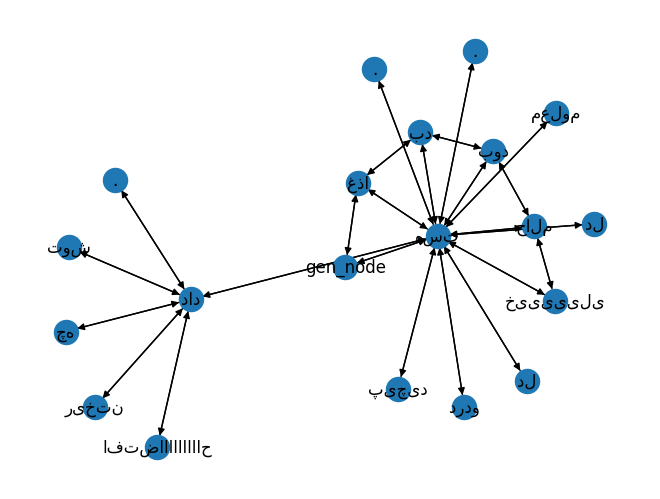

In [ ]:
graph_const.draw_graph(2)

# Test \Practices\Tasks\TextToGraph\DependencyGraphConstructionTest.ipynb

In [ ]:
from Scripts.DataManager.GraphConstructor.DependencyGraphConstructor import DependencyGraphConstructor

In [ ]:
graph_const = DependencyGraphConstructor(train_df['comment'][:10], r'data\GraphData\Dependency', config, naming_prepend='graph', load_preprocessed_data=False, use_node_dependencies=True , use_compression=True)
graph_const.setup(load_preprocessed_data=False)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: fa (Persian):
| Processor | Package        |
------------------------------
| tokenize  | perdt          |
| mwt       | perdt          |
| pos       | perdt_charlm   |
| lemma     | perdt_nocharlm |
| depparse  | perdt_charlm   |
| ner       | arman          |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
 Creating Graphs : 100%|██████████| 10/10 [00:00<00:00, 15893.54it/s]


filename: /content/Beyond-Words/data\GraphData\Dependency/graph_var.txt
self.start_data_load: 0
self.end_data_load: 10
self.saving_batch_size: 1000



 Loding Graphs From File :   0%|          | 0/1 [00:00<?, ?it/s]

data path: /content/Beyond-Words/data\GraphData\Dependency/0_10_compressed.pt
first step after loading data



Prepare loaded data: 100%|██████████| 10/10 [00:42<00:00,  4.22s/it]


before pass


 Loding Graphs From File : 100%|██████████| 1/1 [01:12<00:00, 72.21s/it]

after loading data and pass


In [ ]:
graph_const.save_all_data_compressed()

In [ ]:
graph_const.save_all_data_compressed()

In [ ]:
print(graph_const.get_first()['word'].x)
print(graph_const.get_first()['dep'].x.shape)
print(graph_const.get_first()['word', 'word_dep' , 'dep'].edge_index)
print(graph_const.get_first()['word', 'word_dep' , 'dep'].edge_attr)

tensor([[ 5.3703e-02, -3.1285e-02,  7.4596e-02,  ..., -1.2119e-02,
          9.7071e-02,  4.9264e-02],
        [-2.4939e-01, -2.8878e-02, -1.7061e-02,  ...,  3.3775e-02,
         -1.6614e-02,  1.5811e-02],
        [-1.2056e-01,  4.8654e-02,  8.9177e-05,  ...,  1.4781e-02,
         -4.6186e-02,  2.0110e-02],
        ...,
        [-2.4939e-01, -2.8878e-02, -1.7061e-02,  ...,  3.3775e-02,
         -1.6614e-02,  1.5811e-02],
        [-8.3295e-02,  4.4717e-03,  5.5533e-02,  ...,  2.6068e-01,
         -4.4478e-02,  2.3992e-01],
        [-1.0800e-01, -1.1538e-01, -9.0927e-04,  ..., -2.9233e-02,
         -3.7353e-02, -3.8090e-02]])
torch.Size([66])
tensor([[ 3,  3,  3,  6,  3, 10,  7, 10,  6, 10],
        [48,  4, 22, 11, 54, 48, 45,  4,  0, 22]], dtype=torch.int32)
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])


In [ ]:
graph_const = DependencyGraphConstructor(train_df['comment'][:10], r'data\GraphData\Dependency', config, naming_prepend='graph', load_preprocessed_data=False, use_node_dependencies=False , use_compression=True)
graph_const.setup(load_preprocessed_data=False)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: fa (Persian):
| Processor | Package        |
------------------------------
| tokenize  | perdt          |
| mwt       | perdt          |
| pos       | perdt_charlm   |
| lemma     | perdt_nocharlm |
| depparse  | perdt_charlm   |
| ner       | arman          |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
 Creating Graphs : 100%|██████████| 10/10 [00:00<00:00, 77816.40it/s]


filename: /content/Beyond-Words/data\GraphData\Dependency/graph_var.txt
self.start_data_load: 0
self.end_data_load: 10
self.saving_batch_size: 1000



 Loding Graphs From File :   0%|          | 0/1 [00:00<?, ?it/s]

data path: /content/Beyond-Words/data\GraphData\Dependency/0_10_compressed.pt
first step after loading data



 Loding Graphs From File :   0%|          | 0/1 [00:28<?, ?it/s]


AttributeError: 'GlobalStorage' object has no attribute 'edge_types'

In [ ]:
graph_const.save_all_data_compressed()
graph_const.load_all_data_comppressed()

filename: /content/Beyond-Words/data\GraphData\Dependency/graph_var.txt
data loading 0


AttributeError: 'GlobalStorage' object has no attribute 'edge_types'

In [ ]:
print(graph_const.get_first().x)
print(graph_const.get_first().edge_index)
print(graph_const.get_first().edge_attr)

In [ ]:
!pip uninstall pandas

In [34]:
import pandas as pd

df = pd.read_csv("data.csv")

In [35]:
df.head()

,Text,Score,Suggestion
0,این اولین تجربه من برای خرید ایفون هست امروز...,100,1
1,خرید این محصول رو توصیه میکنم,84,1
2,1 ساله این گوشی رو دارم هیچ نقطه ضعفی ازش ند...,60,1
3,سلام خدمت دوستان این گوشی از همه نظر عالی کیف...,96,1
4,سلام دوستانی که نگران شکستن صفحه نمایش هستند ا...,92,1


In [36]:
df.__len__

<bound method DataFrame.__len__ of                                                    Text  Score  Suggestion
0     این اولین تجربه من برای خرید ایفون هست   امروز...    100           1
1                        خرید این محصول رو توصیه میکنم      84           1
2     1 ساله این گوشی رو دارم   هیچ نقطه ضعفی ازش ند...     60           1
3     سلام خدمت دوستان این گوشی از همه نظر عالی  کیف...     96           1
4     سلام دوستانی که نگران شکستن صفحه نمایش هستند ا...     92           1
...                                                 ...    ...         ...
3256  کیفت ساختش خوبه تنوعش هم خوبه   فقط مشکلش اینه...     84           2
3257           خیلی خوب و به درد بخوره و اندازشم عالیه     100           1
3258  عالیه خیلی دوسش دارم قیمتش یه کم زیاده ولی به ...    100           1
3259  من این مینی فرز رو از دیحیکالا سفارش دادم و به...     84           1
3260  بعد از چند دقیقه که باهاش کار کنی سریع داغ میش...     48           3

[3261 rows x 3 columns]>

In [60]:
from sklearn.utils import shuffle, resample

test1 = shuffle(df)
test2 = resample(df)

In [61]:
test1.head(5)

,Text,Score,Suggestion
2934,جهت پخت سالم مواد غذایی وسیله بسیار مناسبی است...,76,2
157,لب تاب خوبیه با بازده ی بالا برای یه کاربر معم...,92,1
2928,درکل همه چیش خوبه,80,1
870,کیفیت تصویر خیلی خوبه داره اما الان که یک سال ...,80,1
2020,اگر فقط برای مکالمه با موبایل و گهگاهی گوش داد...,48,3


In [62]:
test2.head(5)

,Text,Score,Suggestion
643,خیلی لپ تاپ خوب و شیکی هستش و از لحاظ سخت افزا...,60,1
837,نمی دونم چی باید بنویسم حرف اخر اول مینویسم نس...,88,1
62,فوق العاده گوشی بی کیفیت هستش میکروفون و اسپیک...,48,3
2103,قسمت خورد کن به سرعت خراب شد محل اتصال شفت م...,28,3
1789,تازه امروز رسید به دستم و بعد برسسیش حیفم اومد...,76,2


In [64]:
test3 = df.sample(frac=1)

In [65]:
test3.head(5)

,Text,Score,Suggestion
1184,خیلی بزرگن برای قابلمه و ماهیتابه های کوچیک اص...,52,2
2996,عاااالیه و اینکه چراغ ال ای دی و نمایشگر میزان...,96,1
1028,من پوستم تقریبا سفیده ولی این کرمو که زدم شبیه...,60,2
1779,قابلیت تعقیبش خیلی خوبه ولی کیفیتش خیلی نا امی...,40,3
1209,عالیه من خیلی راضیم,100,1


In [66]:
for i in range(2000):
    test3 = test3.sample(frac=1)
    test3 = shuffle(test3)

In [76]:
test3.head(6)

,Text,Score,Suggestion
1360,سه هفتس که دارمش خیلی عالیه واقعا با وجود این ...,80,1
388,با کیفیت و مناسب هست اما باتری تا پنج ساعت بی...,64,1
141,دستگاه خیلی شیک و عالی و خوش دستی هست ولی حیف ...,80,1
417,با سلام با توجه به اینکه بیش از ده سال است که ...,60,2
2001,بسیار قوی و با کیفیته و فقط باید مستقیم به پخش...,96,1
65,خیلی راضی بودم متاسفانه ازم دزدیدن,100,1


In [77]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(test3, test_size=0.2, random_state=0, shuffle=True)

train.to_csv(r"C:\Users\razieh\Downloads\Beyond-Words\data\DigiKala\train_sm.csv", index=False, header=False)
test.to_csv(r"C:\Users\razieh\Downloads\Beyond-Words\data\DigiKala\test_sm.csv", index=False, header=False)

In [78]:
df['Suggestion'].value_counts()

Suggestion
1    2382
3     460
2     419
Name: count, dtype: int64

In [79]:
pd_train = pd.read_csv(r"C:\Users\razieh\Downloads\Beyond-Words\data\DigiKala\train_sm.csv")
pd_test = pd.read_csv(r"C:\Users\razieh\Downloads\Beyond-Words\data\DigiKala\test_sm.csv")

In [80]:
pd_train.head(5)

,کیفیت ساخت و متریال بسیار عالی,100,1
0,بسیار زیبا,68,2
1,دوستان دقت کنید به همراه این هدفون یک مبدل جک ...,24,3
2,خیلی شیک و قشنگه واسه گرم کردن نون سنگک یا هر ...,60,1
3,عالیه واقعا راضی ام واقعا می ارزه,100,1
4,کلا لنوو ها کیفیت بدنه پایینی دارند این دستگاه...,60,2


In [81]:
pd_test.head(5)

,نه تبلته که صفحه بزرگی داشته باشه نه موبایله که راحت حمل بشه به جای هیچ کدوم نمیشه استفاده کرد مجبوری برای تماس ها از هندزفری استفاده کنی چون نمیفهمی طرف مقابل داره چی میگه بعد از یک سال وقتی با دکمه صدا رو میخوام زیاد کنم یهو صدا خیلی زیاد میشه بعضی وقتها صفحه رمز که نشون داده میشه هنگه باید یه بار صفحه خاموش و روشن بشه همزمانی صدا و تصویر ویدوئوها بعد از یه مدت به هم خورد توی بالا و پایین کردن صفحات گاهی پرش می بینم,44,3
0,خیلی عالیه همه کاری باهاش کردم ولی فقط واسه با...,88,1
1,من سه ساله اینو دارم و فقط میتونم بگم تا الان ...,100,1
2,این اولین موبایلی بود که داشتم و کلی هم کارمو ...,80,1
3,یه هندسفری کاملا معمولی هست فقط ارگونومی خوب د...,36,3
4,دستگاه خیلی خوبی هست روی تمام کاغذها میزنه گل...,60,1


In [83]:
doc = [(1,2,3), (4,5,6)]
for idx, token in enumerate(doc):
    print(idx, token[2])

0 3
1 6


In [85]:
import spacy

doc = spacy.load('en_core_web_lg')

c:\Users\razieh\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\razieh\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
c:\Users\razieh\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [86]:
doc = doc('hi, it is sentence one. and it is sentence 2')

In [87]:
for token in doc:
    print(token)

hi
,
it
is
sentence
one
.
and
it
is
sentence
2
